In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\Foundation AI\Downloads\logistic_regression.csv\logistic_regression.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
null_percent = df.isnull().sum()/len(df)*100

In [6]:
null_percent

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

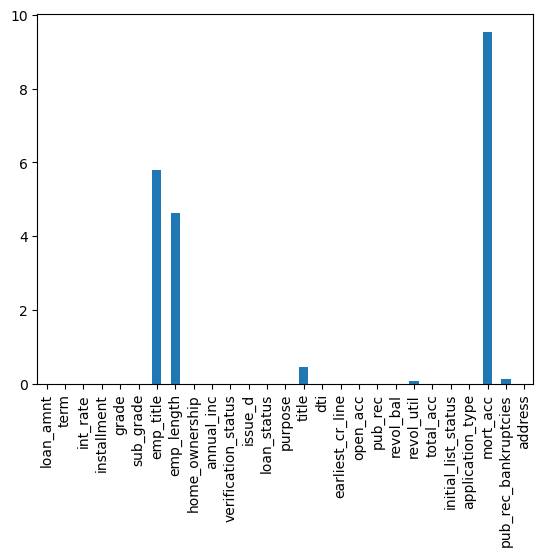

In [7]:
null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
# plt.figure(figsize=(10, 7), dpi=100)
# sns.pairplot(data=df, height=4)
# plt.show()

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,335868.0,14522.747627,8386.593240,1000.00,8000.00,12400.00,20000.00,40000.00
int_rate,335868.0,13.795634,4.505201,5.32,10.64,13.35,16.78,30.99
installment,335868.0,445.158837,251.588273,28.75,263.78,388.20,583.79,1533.81
annual_inc,335868.0,75817.159947,61972.188563,5000.00,47000.00,65000.00,90000.00,8706582.00
dti,335868.0,17.719144,8.147837,0.00,11.63,17.25,23.42,380.53
open_acc,335868.0,11.598324,5.181585,1.00,8.00,11.00,14.00,90.00
pub_rec,335868.0,0.184921,0.543618,0.00,0.00,0.00,0.00,86.00
revol_bal,335868.0,16193.056674,20990.685224,0.00,6302.00,11480.00,19990.25,1743266.00
revol_util,335868.0,54.365450,23.962637,0.00,36.90,55.30,73.00,892.30
total_acc,335868.0,25.858912,11.901536,2.00,17.00,24.00,33.00,151.00


<AxesSubplot:>

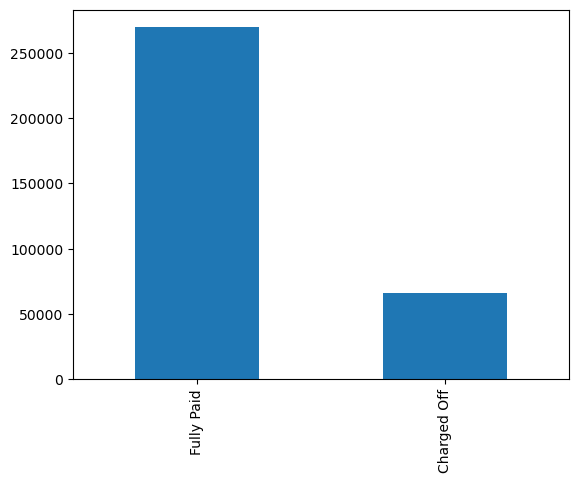

In [11]:
df['loan_status'].value_counts().plot(kind='bar')

In [12]:
df['loan_status'].value_counts()

Fully Paid     269556
Charged Off     66312
Name: loan_status, dtype: int64

In [13]:
integer_cols = df.select_dtypes(include=['float64', 'int']).columns

In [14]:
integer_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
df['int_rate']

0         11.44
1         11.99
2         10.49
3          6.49
4         17.27
          ...  
396024    13.11
396025    10.99
396026    12.29
396027     9.99
396028    15.31
Name: int_rate, Length: 335868, dtype: float64

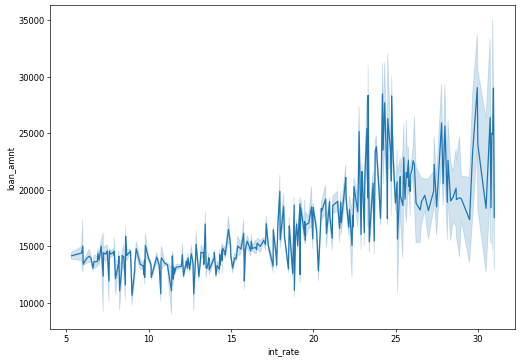

In [16]:
plt.figure(figsize=(10, 7), dpi=60)
sns.lineplot(data=df, x='int_rate', y='loan_amnt')
sns.set_palette(palette='dark')
plt.show()

This graph shows the int_rate increases as the loan amount increase.

In [17]:
df['installment']

0         329.48
1         265.68
2         506.97
3         220.65
4         609.33
           ...  
396024    202.49
396025    217.38
396026    700.42
396027    161.32
396028    503.02
Name: installment, Length: 335868, dtype: float64

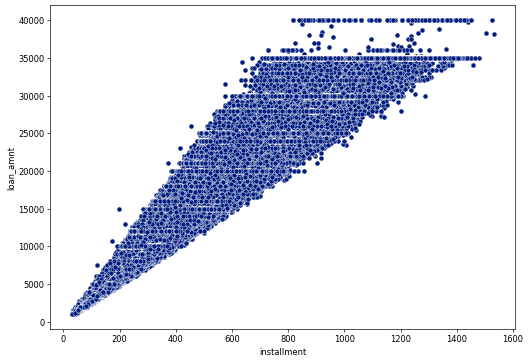

In [18]:
plt.figure(figsize=(10, 7), dpi=60)
sns.scatterplot(data=df, x='installment', y='loan_amnt',)
sns.set_palette(palette='muted')
plt.show()

In [19]:
df['annual_inc']

0         117000.0
1          65000.0
2          43057.0
3          54000.0
4          55000.0
            ...   
396024     64000.0
396025     40000.0
396026    110000.0
396027     56500.0
396028     64000.0
Name: annual_inc, Length: 335868, dtype: float64

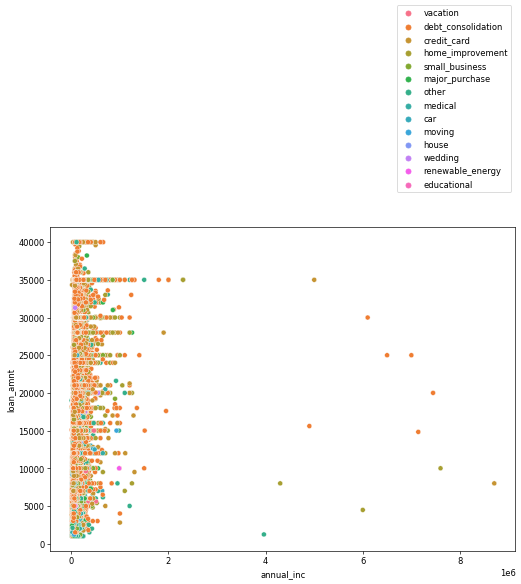

In [20]:
plt.figure(figsize=(10, 7), dpi=60)
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', hue='purpose')
plt.legend(bbox_to_anchor=(1, 1.7))
plt.show()

In [21]:
df['dti']

0         26.24
1         22.05
2         12.79
3          2.60
4         33.95
          ...  
396024    10.81
396025    15.63
396026    21.45
396027    17.56
396028    15.88
Name: dti, Length: 335868, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


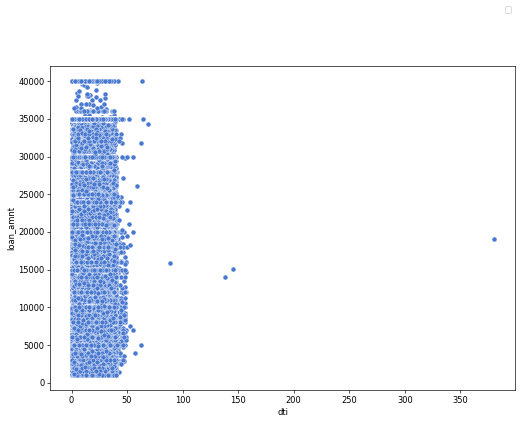

In [22]:
plt.figure(figsize=(10, 7), dpi=60)
sns.scatterplot(data=df, x='dti', y='loan_amnt')
sns.set_palette('dark')
plt.legend(bbox_to_anchor=(1, 1.2))
plt.show()

<AxesSubplot:ylabel='Frequency'>

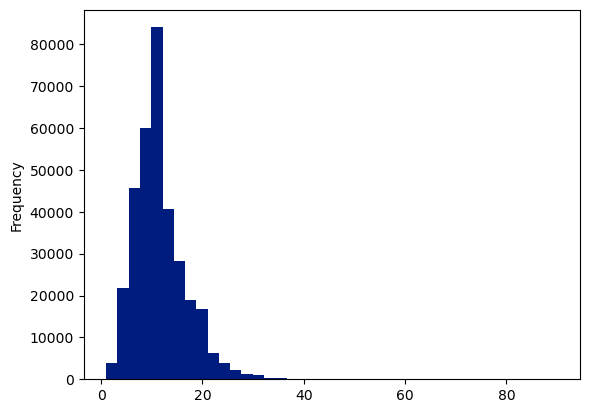

In [23]:
df['open_acc'].plot(kind='hist', bins=40)

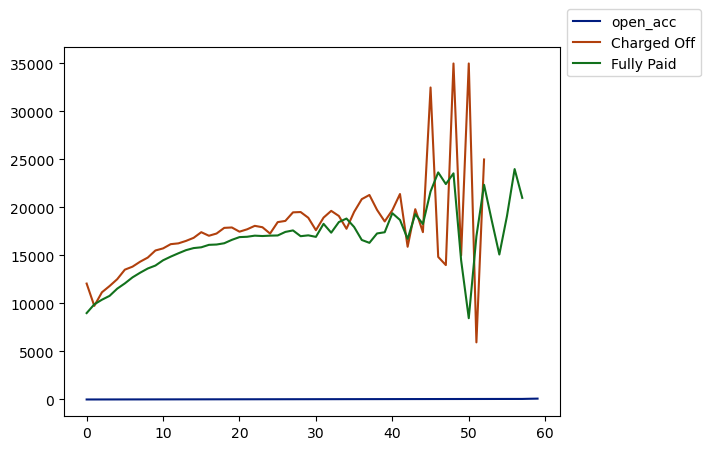

In [24]:
df.groupby(['open_acc', 'loan_status'])['loan_amnt'].mean().unstack().reset_index().plot()
plt.legend(bbox_to_anchor=(1, 1.12))
plt.show()

In [25]:
sub_cols = ['pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc','pub_rec_bankruptcies']

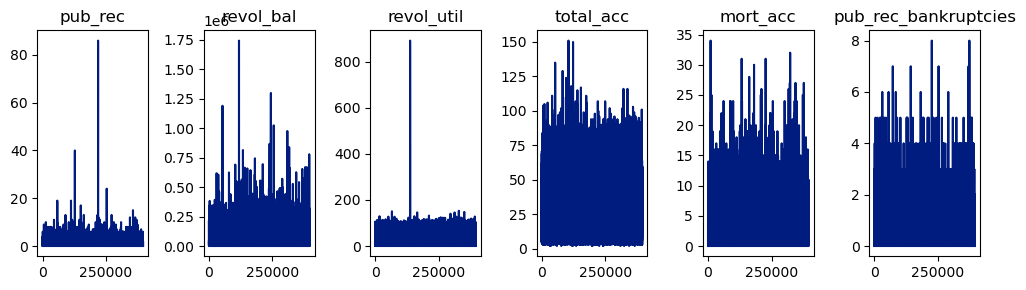

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=len(sub_cols), figsize=(10, 3))
for a, cols in zip(ax, sub_cols):
    a.plot(df[cols])
    a.set_title(cols)

plt.tight_layout()

    

In [27]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396024    514 Cynthia Park Apt. 402\r\nWest Williamside,...
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
Name: address, Length: 335868, dtype: object

In [28]:
df['pincode'] = df['address'].str.split(' ').str[-1]

In [29]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pincode
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,...,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\r\nWest Williamside,...",05113
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",30723
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",05113
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",70466


In [30]:
for col in df.columns:
    print(f"{col}: {'-' * (20-len(col)) } {df[col].nunique()}")

loan_amnt: ----------- 1388
term: ---------------- 2
int_rate: ------------ 265
installment: --------- 48696
grade: --------------- 7
sub_grade: ----------- 35
emp_title: ----------- 150833
emp_length: ---------- 11
home_ownership: ------ 6
annual_inc: ---------- 21339
verification_status: - 3
issue_d: ------------- 58
loan_status: --------- 2
purpose: ------------- 14
title: --------------- 32187
dti: ----------------- 4213
earliest_cr_line: ---- 661
open_acc: ------------ 60
pub_rec: ------------- 20
revol_bal: ----------- 53310
revol_util: ---------- 1155
total_acc: ----------- 117
initial_list_status: - 2
application_type: ---- 3
mort_acc: ------------ 33
pub_rec_bankruptcies:  9
address: ------------- 334143
pincode: ------------- 10


Based on the result above, we can drop the colunms that don't follow the pattern . ie title, address, emp_title

In [31]:
df.drop(labels=['title', 'address', 'emp_title'], axis=1, inplace=True)

In [32]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,5 years,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,05113
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,05113
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466


In [33]:
cat_cols = df.select_dtypes(include='object').columns

In [34]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'pincode'],
      dtype='object')

In [35]:
df['term'].value_counts()

 36 months    254776
 60 months     81092
Name: term, dtype: int64

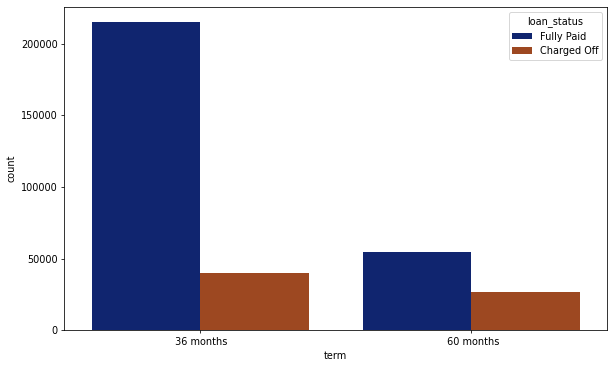

In [36]:
plt.figure(figsize=(10, 6), dpi=70)
sns.countplot(data=df, x='term', hue='loan_status')
plt.show()

We can see that applicatants taken loan for short time (36 months) more than longer duration (60 months) and they fully paid.

In [37]:
df['term'] = df['term'].str.split(' ').str[-2]

In [38]:
df['term'] = df['term'].astype(int)

In [39]:
df['purpose'].value_counts()

debt_consolidation    204310
credit_card            72648
home_improvement       19637
other                  16194
major_purchase          6367
small_business          3397
medical                 3239
car                     3074
moving                  2178
vacation                1956
house                   1713
wedding                  929
renewable_energy         225
educational                1
Name: purpose, dtype: int64

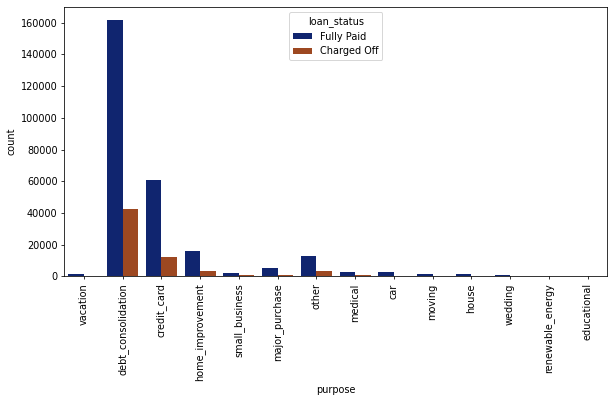

In [40]:
plt.figure(figsize=(10, 5), dpi=70)
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

We can see that most of the loans have taken for loan consolidation, credit card and home improvements. they are fully paid.

In [41]:
df['grade'].value_counts()

B    98008
C    92213
D    54640
A    51123
E    27123
F    10168
G     2593
Name: grade, dtype: int64

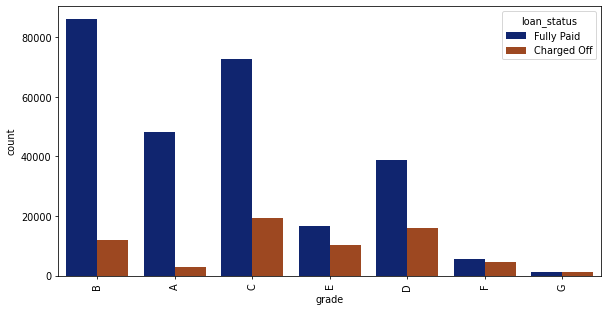

In [42]:
plt.figure(figsize=(10, 5), dpi=70)
sns.countplot(data=df, x='grade', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

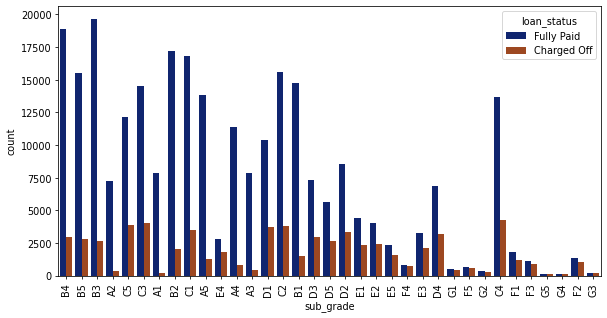

In [43]:
plt.figure(figsize=(10, 5), dpi=70)
sns.countplot(data=df, x='sub_grade', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

In [44]:
df['home_ownership'].value_counts()

MORTGAGE    170832
RENT        133932
OWN          31045
OTHER           30
NONE            28
ANY              1
Name: home_ownership, dtype: int64

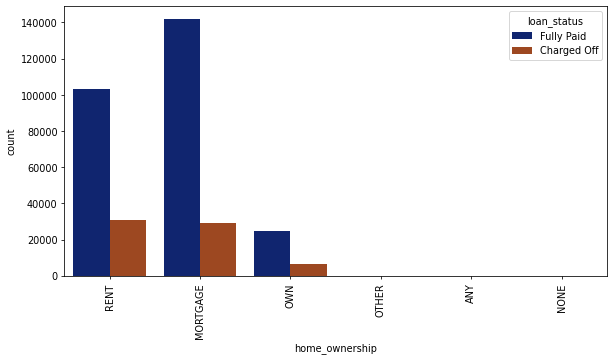

In [45]:
plt.figure(figsize=(10, 5), dpi=70)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

In [46]:
home_none=df[df['home_ownership'] == 'NONE']

In [47]:
df.drop(labels=home_none.index, inplace=True, axis=0)

In [48]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,B,B4,5 years,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,05113
396025,10000.0,60,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723
396026,21000.0,36,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,05113
396027,5000.0,36,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466


In [49]:
df['emp_length'].value_counts()

10+ years    115188
2 years       31390
3 years       27446
< 1 year      27364
5 years       22974
1 year        22612
4 years       20320
7 years       18766
6 years       18385
8 years       17499
9 years       13896
Name: emp_length, dtype: int64

In [50]:
import re

In [51]:
def preprocess_emp_length(text):
    
    p = '\d+'
    
    t = re.findall(pattern=p, string=text)
    
    t = ''.join(t)
    
    return t

In [52]:
preprocess_emp_length('< 1 years')

'1'

In [53]:
df['emp_length'] = df['emp_length'].apply(func=preprocess_emp_length).astype(int)

In [54]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36,11.44,329.48,B,B4,10,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,265.68,B,B5,4,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36,10.49,506.97,B,B3,1,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,220.65,A,A2,6,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,609.33,C,C5,9,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,B,B4,5,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,05113
396025,10000.0,60,10.99,217.38,B,B4,2,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723
396026,21000.0,36,12.29,700.42,C,C1,5,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,05113
396027,5000.0,36,9.99,161.32,B,B1,10,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466


In [55]:
df['verification_status'].value_counts()

Source Verified    115684
Verified           112504
Not Verified       107652
Name: verification_status, dtype: int64

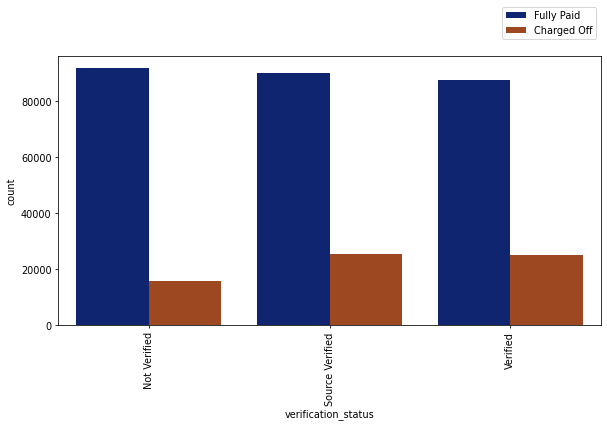

In [56]:
plt.figure(figsize=(10, 5), dpi=70)
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.legend(bbox_to_anchor=(1, 1.2))
plt.xticks(rotation=90)
plt.show()

In [57]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396024    Mar-2013
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
Name: issue_d, Length: 335840, dtype: object

In [58]:
df['issue_d_year'] = df['issue_d'].str.split('-').str[-1]

In [59]:
df['issue_d_year'] = pd.to_numeric(df['issue_d_year'])

In [60]:
df.drop(labels='issue_d', axis=1, inplace=True)

In [61]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396024    Nov-1991
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
Name: earliest_cr_line, Length: 335840, dtype: object

In [62]:
df['ecl_year'] = df['earliest_cr_line'].str.split('-').str[-1]

In [63]:
df['ecl_year'] = pd.to_numeric(df['ecl_year'])

In [64]:
df.drop(labels='earliest_cr_line', axis=1, inplace=True)

In [65]:
df['application_type'].value_counts()

INDIVIDUAL    335284
JOINT            311
DIRECT_PAY       245
Name: application_type, dtype: int64

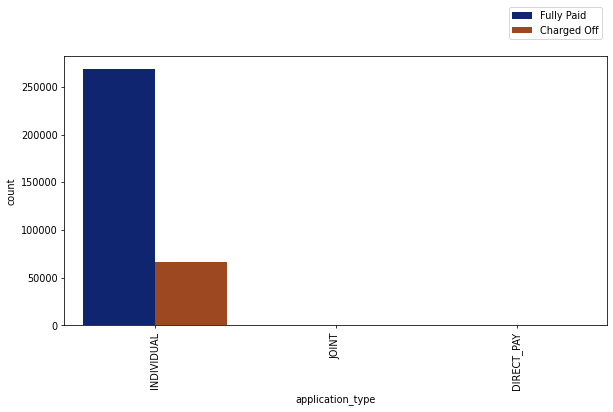

In [66]:
plt.figure(figsize=(10, 5), dpi=70)
sns.countplot(data=df, x='application_type', hue='loan_status')
plt.legend(bbox_to_anchor=(1, 1.2))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

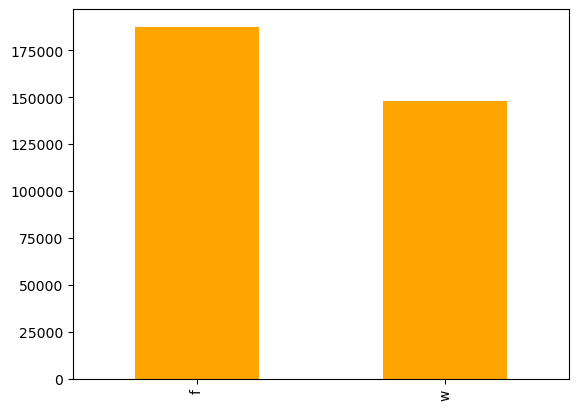

In [67]:
df['initial_list_status'].value_counts().plot(kind='bar', color='orange', )

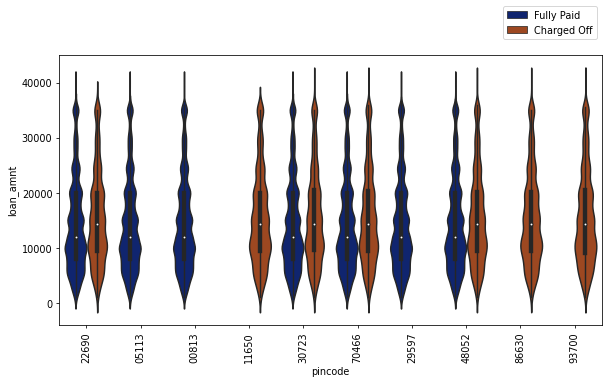

In [68]:
plt.figure(figsize=(10, 5), dpi=70)
sns.violinplot(data=df, x='pincode', y='loan_amnt', hue='loan_status')
plt.legend(bbox_to_anchor=(1, 1.2))
plt.xticks(rotation=90)
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
encoder = LabelEncoder()

In [71]:
categorical_cols = df.select_dtypes('object').columns

In [72]:
categorical_cols

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'initial_list_status', 'application_type',
       'pincode'],
      dtype='object')

In [73]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396024     Fully Paid
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
Name: loan_status, Length: 335840, dtype: object

In [74]:
for col in categorical_cols:
    
    df[col] = encoder.fit_transform(df[col])

In [75]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,issue_d_year,ecl_year
0,10000.0,36,11.44,329.48,1,8,10,4,117000.0,0,...,36369.0,41.8,25.0,1,1,0.0,0.0,3,2015,1990
1,8000.0,36,11.99,265.68,1,9,4,1,65000.0,0,...,20131.0,53.3,27.0,0,1,3.0,0.0,1,2015,2004
2,15600.0,36,10.49,506.97,1,7,1,4,43057.0,1,...,11987.0,92.2,26.0,0,1,0.0,0.0,1,2015,2007
3,7200.0,36,6.49,220.65,0,1,6,4,54000.0,0,...,5472.0,21.5,13.0,0,1,0.0,0.0,0,2014,2006
4,24375.0,60,17.27,609.33,2,14,9,1,55000.0,2,...,24584.0,69.8,43.0,0,1,1.0,0.0,2,2013,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,1,8,5,4,64000.0,0,...,11456.0,97.1,9.0,1,1,0.0,0.0,1,2013,1991
396025,10000.0,60,10.99,217.38,1,8,2,4,40000.0,1,...,1990.0,34.3,23.0,1,1,0.0,0.0,5,2015,2004
396026,21000.0,36,12.29,700.42,2,10,5,1,110000.0,1,...,43263.0,95.7,8.0,0,1,1.0,0.0,1,2015,2006
396027,5000.0,36,9.99,161.32,1,5,10,4,56500.0,2,...,32704.0,66.9,23.0,0,1,0.0,0.0,7,2013,1997


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335840 entries, 0 to 396028
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335840 non-null  float64
 1   term                  335840 non-null  int32  
 2   int_rate              335840 non-null  float64
 3   installment           335840 non-null  float64
 4   grade                 335840 non-null  int32  
 5   sub_grade             335840 non-null  int32  
 6   emp_length            335840 non-null  int32  
 7   home_ownership        335840 non-null  int32  
 8   annual_inc            335840 non-null  float64
 9   verification_status   335840 non-null  int32  
 10  loan_status           335840 non-null  int32  
 11  purpose               335840 non-null  int32  
 12  dti                   335840 non-null  float64
 13  open_acc              335840 non-null  float64
 14  pub_rec               335840 non-null  float64
 15  

In [77]:
corr = df.corr()

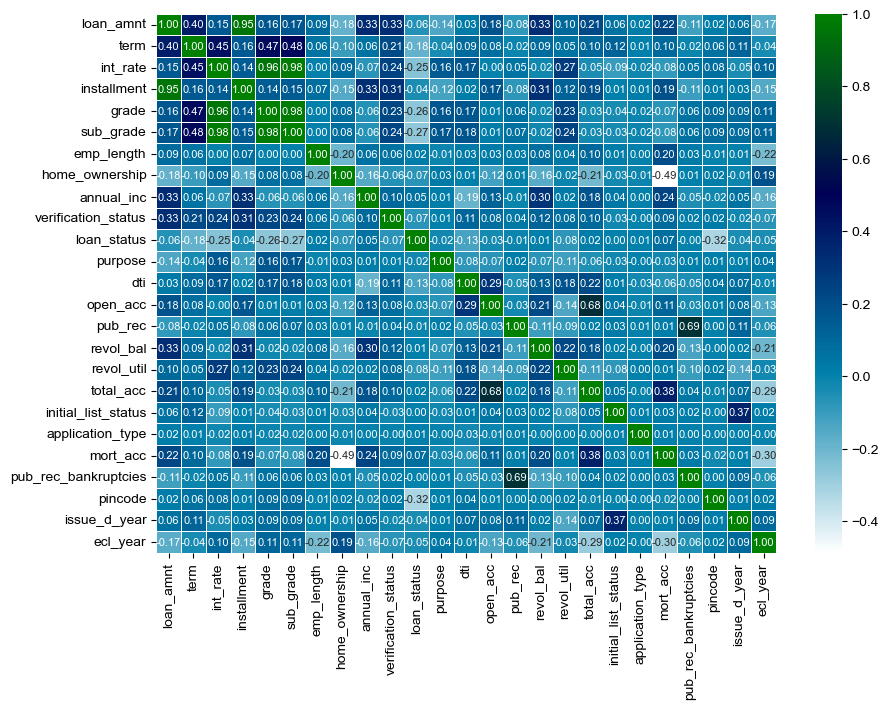

In [78]:
plt.figure(figsize=(10, 7), dpi=100)
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=0.5, annot_kws={'size': 8}, cmap='ocean_r')
sns.set_style('darkgrid')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop(columns=['loan_status'])

In [81]:
y = df['loan_status']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, test_size=0.3)

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
smote = SMOTE(random_state=42)

In [85]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [86]:
X_train

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,issue_d_year,ecl_year
16389,15000.0,36,13.05,505.78,1,9,7,4,75000.0,0,...,13561.0,63.7,20.0,0,1,0.0,1.0,4,2013,2000
353404,22500.0,36,10.99,736.52,1,6,10,1,100000.0,0,...,16096.0,43.9,34.0,0,1,2.0,0.0,3,2014,2000
77730,28000.0,60,22.70,784.52,4,24,7,1,135000.0,2,...,15240.0,53.7,39.0,1,1,4.0,0.0,3,2013,2000
308838,12000.0,60,15.61,289.34,3,15,1,1,52000.0,0,...,11932.0,71.2,41.0,1,1,4.0,1.0,6,2015,1999
67942,24000.0,36,6.49,735.47,0,1,10,1,96000.0,1,...,22517.0,23.9,31.0,0,1,3.0,0.0,1,2014,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,15000.0,60,17.99,380.82,3,16,6,1,62500.0,0,...,15930.0,32.6,29.0,0,1,3.0,0.0,0,2016,2004
235682,24575.0,60,16.29,601.41,2,13,8,4,55000.0,2,...,14621.0,79.0,21.0,0,1,0.0,0.0,8,2013,2001
265425,15525.0,60,23.99,446.54,5,27,10,4,37000.0,2,...,16690.0,60.7,24.0,1,1,2.0,0.0,9,2015,2000
180990,4800.0,36,7.90,150.20,0,3,4,4,69800.0,2,...,14709.0,63.1,28.0,0,1,0.0,0.0,7,2012,1975


In [87]:
y_train_smote.value_counts()

1    188640
0    188640
Name: loan_status, dtype: int64

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
vif_data = pd.DataFrame()
vif_data['columns'] = X_train_smote.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_smote.values, i) for i in range(X_train_smote.shape[1])]
print(vif_data)

                 columns            VIF
0              loan_amnt     304.514855
1                   term     152.048442
2               int_rate     338.212684
3            installment     268.674227
4                  grade      45.341962
5              sub_grade     192.739366
6             emp_length       4.518407
7         home_ownership       5.501226
8             annual_inc       3.588865
9    verification_status       2.987040
10               purpose       2.718757
11                   dti       8.805069
12              open_acc      14.556951
13               pub_rec       2.059610
14             revol_bal       2.331610
15            revol_util       9.283897
16             total_acc      15.006036
17   initial_list_status       1.708411
18      application_type     532.526654
19              mort_acc       2.875675
20  pub_rec_bankruptcies       2.112264
21               pincode       4.793494
22          issue_d_year  117269.802700
23              ecl_year  116024.644984


In [90]:
X_train_clean = X_train_smote.drop(columns=['issue_d_year', 'term', 'ecl_year', 'application_type', 'total_acc', 'sub_grade', 'int_rate','installment', 'grade', 'open_acc'])

In [91]:
X_train_clean

,loan_amnt,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,pincode
0,15000.000000,7,4,75000.000000,0,2,8.860000,1.000000,13561.000000,63.700000,0,0.000000,1.000000,4
1,22500.000000,10,1,100000.000000,0,1,18.640000,0.000000,16096.000000,43.900000,0,2.000000,0.000000,3
2,28000.000000,7,1,135000.000000,2,2,15.120000,0.000000,15240.000000,53.700000,1,4.000000,0.000000,3
3,12000.000000,1,1,52000.000000,0,1,16.730000,1.000000,11932.000000,71.200000,1,4.000000,1.000000,6
4,24000.000000,10,1,96000.000000,1,2,10.340000,0.000000,22517.000000,23.900000,0,3.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377275,8011.986191,7,4,60000.000000,1,2,10.792457,1.000000,7446.239724,66.116410,0,2.678067,1.000000,4
377276,35000.000000,8,1,250000.000000,2,1,13.304378,5.128066,35688.890025,71.433515,1,3.564033,0.000000,3
377277,12000.000000,2,3,50000.000000,0,1,16.975587,0.000000,9548.771518,59.764258,0,1.099547,0.000000,6
377278,20240.459412,6,2,72000.000000,2,2,26.486643,0.000000,18769.633202,62.361838,0,3.114487,0.000000,6


In [92]:
vif_data = pd.DataFrame()
vif_data['columns'] = X_train_clean.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_clean.values, i) for i in range(X_train_clean.shape[1])]
print(vif_data)

                 columns       VIF
0              loan_amnt  5.584214
1             emp_length  4.012216
2         home_ownership  4.113827
3             annual_inc  3.329837
4    verification_status  2.910062
5                purpose  2.288105
6                    dti  6.391571
7                pub_rec  2.044327
8              revol_bal  2.163458
9             revol_util  6.819143
10   initial_list_status  1.524347
11              mort_acc  2.300403
12  pub_rec_bankruptcies  2.083539
13               pincode  4.270536


In [93]:
X_train_clean

,loan_amnt,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,pincode
0,15000.000000,7,4,75000.000000,0,2,8.860000,1.000000,13561.000000,63.700000,0,0.000000,1.000000,4
1,22500.000000,10,1,100000.000000,0,1,18.640000,0.000000,16096.000000,43.900000,0,2.000000,0.000000,3
2,28000.000000,7,1,135000.000000,2,2,15.120000,0.000000,15240.000000,53.700000,1,4.000000,0.000000,3
3,12000.000000,1,1,52000.000000,0,1,16.730000,1.000000,11932.000000,71.200000,1,4.000000,1.000000,6
4,24000.000000,10,1,96000.000000,1,2,10.340000,0.000000,22517.000000,23.900000,0,3.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377275,8011.986191,7,4,60000.000000,1,2,10.792457,1.000000,7446.239724,66.116410,0,2.678067,1.000000,4
377276,35000.000000,8,1,250000.000000,2,1,13.304378,5.128066,35688.890025,71.433515,1,3.564033,0.000000,3
377277,12000.000000,2,3,50000.000000,0,1,16.975587,0.000000,9548.771518,59.764258,0,1.099547,0.000000,6
377278,20240.459412,6,2,72000.000000,2,2,26.486643,0.000000,18769.633202,62.361838,0,3.114487,0.000000,6


In [94]:
y_train_smote

0         1
1         0
2         1
3         0
4         1
         ..
377275    0
377276    0
377277    0
377278    0
377279    0
Name: loan_status, Length: 377280, dtype: int32

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_reg = LogisticRegression(solver='liblinear')

In [97]:
log_reg.fit(X_train_clean, y_train_smote)

LogisticRegression(solver='liblinear')

In [98]:
X_train_clean.columns

Index(['loan_amnt', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'pincode'],
      dtype='object')

In [99]:
X_test.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'issue_d_year', 'ecl_year'],
      dtype='object')

In [100]:
X_test_val = X_test[['loan_amnt', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'pincode']]

In [101]:
X_test_val

,loan_amnt,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,pincode
10341,10375.0,4,4,30000.0,1,1,12.32,0.0,8963.0,40.6,0,0.0,0.0,0
284785,15250.0,3,3,58000.0,1,11,15.43,0.0,10798.0,67.5,1,1.0,0.0,3
117748,8000.0,4,1,42000.0,0,2,22.26,0.0,15303.0,34.0,0,1.0,0.0,9
283693,19200.0,2,4,54000.0,0,2,10.51,0.0,14291.0,47.2,0,0.0,0.0,7
18998,30000.0,3,1,63000.0,1,2,9.92,0.0,10781.0,58.6,0,2.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220536,35000.0,3,1,141000.0,2,2,19.28,0.0,43709.0,82.6,0,12.0,0.0,7
394546,11100.0,7,3,32000.0,0,2,16.35,0.0,8568.0,68.0,0,0.0,0.0,5
56215,12800.0,5,4,125000.0,1,2,7.90,0.0,9214.0,18.0,0,0.0,0.0,7
153173,3000.0,10,3,50000.0,0,4,12.07,0.0,2352.0,11.7,0,0.0,0.0,5


In [102]:
pred = log_reg.predict(X_test_val)

In [103]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [104]:
print(confusion_matrix(pred, y_test))

[[13254 31555]
 [ 6604 49339]]


In [105]:
accuracy_score(pred, y_test)

0.6212581387962521

<AxesSubplot:>

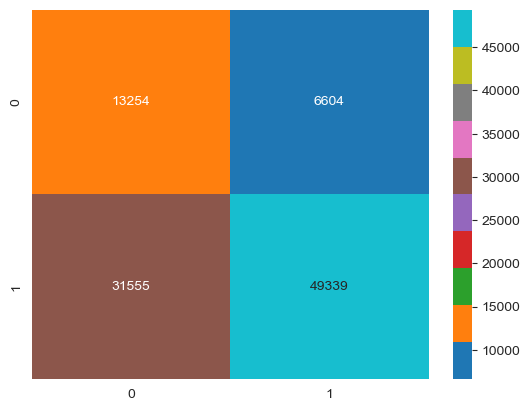

In [106]:
sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='tab10')

In [107]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.30      0.41     44809
           1       0.61      0.88      0.72     55943

    accuracy                           0.62    100752
   macro avg       0.64      0.59      0.57    100752
weighted avg       0.64      0.62      0.58    100752

